## Especificación del filtro
\begin{align}
    &f_a = 1kHz \\
    &f_p = 2kHz \\
    &f_s = 44.1kHz \\
    &A_a = 20dB \\
    &A_p = 2dB
\end{align}

In [1]:
from matplotlib import pyplot
from scipy import signal
import numpy as np

fa = 1e3
fp = 2e3
fs = 44100
aa = 20
ap = 2

In [2]:
dw = 2 * np.pi * np.abs(fp - fa) / fs
N = int(np.ceil(4 * np.pi / dw - 1))
if (N % 2) == 0:
    N = N + 1
wc = 2 * np.pi * (fa + fp) / 2

print(f'Ventana RECTANGULAR con N = {N}')
print(f'Filtro pasa-altos ideal con wc = {np.round(wc, 3)}')

Ventana RECTANGULAR con N = 89
Filtro pasa-altos ideal con wc = 9424.778


In [3]:
h = np.zeros(N)
for n in range(N):
    if n == (N - 1) // 2:
        h[n] = 1 - 2 * (wc / (2 * np.pi * fs))
    else:
        h[n] = - np.sin((n - (N - 1) / 2) * wc / fs) / (np.pi * (n - (N - 1) / 2))

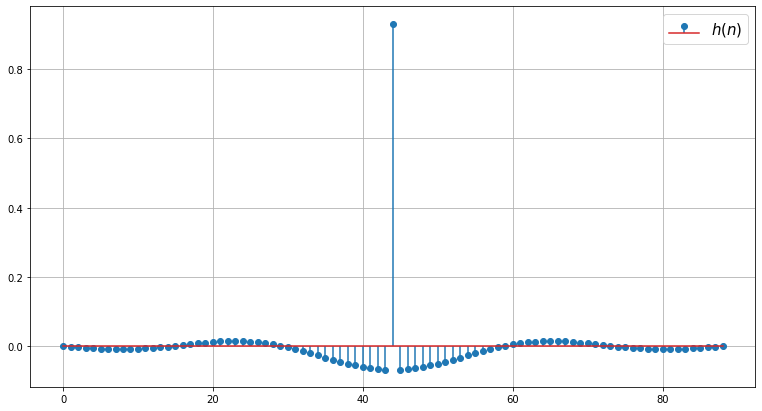

In [4]:
fig, ax = pyplot.subplots(1, 1)

fig.set_figwidth(13)
fig.set_figheight(7)

ax.stem(h, label="$h(n)$", use_line_collection=True)
ax.legend(fontsize=15)
ax.grid()

pyplot.show()

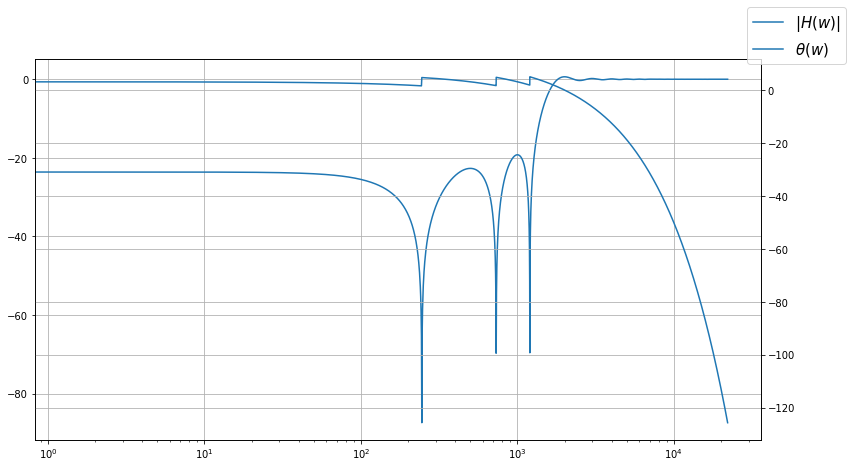

In [15]:
w, H = signal.freqz(h, worN=4*4096)
m = 20 * np.log10(np.abs(H))
p = np.unwrap(np.angle(H))

fig, ax = pyplot.subplots(1, 1)

fig.set_figwidth(13)
fig.set_figheight(7)

ax.semilogx(w * fs / (2 * np.pi), m, label="$|H(w)|$")
ax.grid()

ax2 = ax.twinx()
ax2.grid()
ax2.semilogx(w * fs / (2 * np.pi), p, label="$\\theta (w)$")

fig.legend(fontsize=15)

pyplot.show()